# Correlation-coefficient
https://github.com/alvason/correlation-coefficient

### Linear fitness 

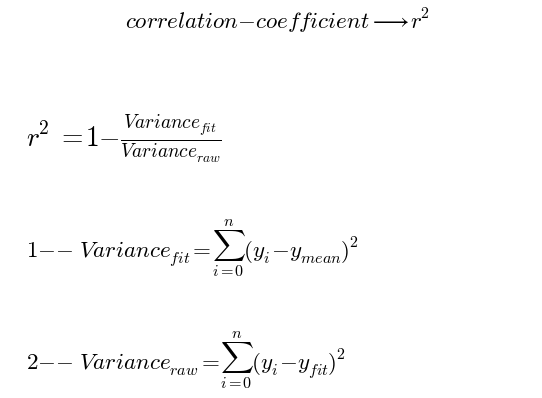

In [5]:
'''
author: Alvason Zhenhua Li
date:   07/18/2015
'''

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
saving_dir_path = '/Users/al/Desktop/GitHub/probability-insighter/figure'
file_name = 'linear-fitness'

import alva_machinery_statistics as alva

AlvaFontSize = 23
AlvaFigSize = (16, 7)
numberingFig = 0

# plotting
figure_name = '-equation'
file_suffix = '.png'
save_figure = os.path.join(saving_dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(9, 6))
plt.axis('off')
plt.title(r'$ correlation-coefficient \longrightarrow r^2 $',fontsize = AlvaFontSize)
plt.text(0, 2.0/3, r'$ r^2 = 1 - \frac{Variance_{fit}}{Variance_{raw}} $', fontsize = 1.2*AlvaFontSize)
plt.text(0, 1.0/3, r'$ 1-- \ Variance_{fit} = \sum_{i = 0}^{n} (y_i - y_{mean})^2 $', fontsize = AlvaFontSize)
plt.text(0, 0.0/3, r'$ 2-- \ Variance_{raw} = \sum_{i = 0}^{n} (y_i - y_{fit})^2 $', fontsize = AlvaFontSize)
plt.savefig(save_figure, dpi = 100)
plt.show()

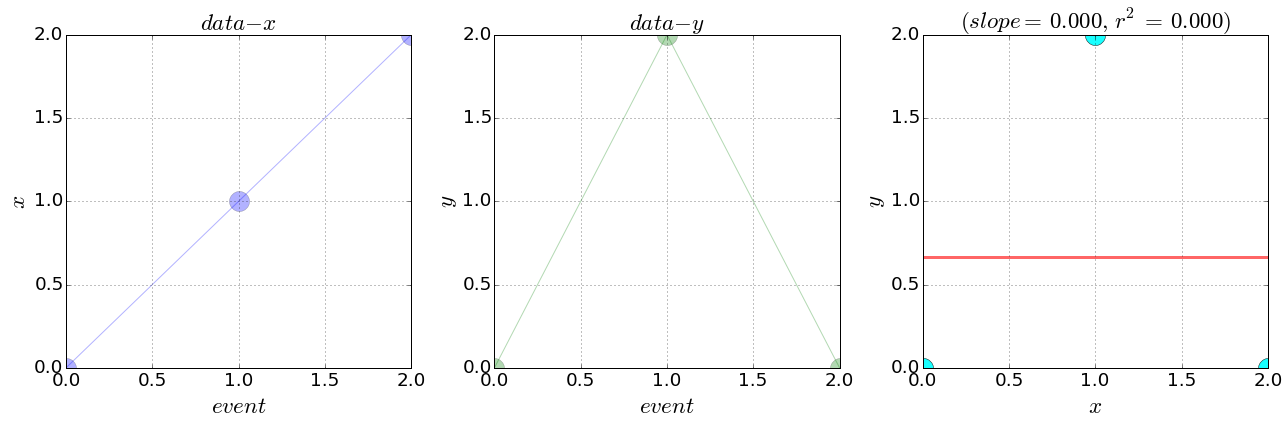

In [6]:
'''uniform randomness distribution'''
total_event = int(3)
gEvent = np.arange(total_event)

x = np.sin(np.pi*gEvent/(total_event/1)) #+ np.random.uniform(0, 1, total_event)*0.5
y = np.cos(np.pi*gEvent/(total_event/2)) #* total_event/(total_event + 3*gEvent)

x = np.array([0.0, 1.0, 2.0])
y = np.array([0.0, 2.0, 0.0])

# fitting
linear_fit = alva.AlvaLinearFit(x, y)
slopeFit = linear_fit[0]
constantFit = linear_fit[1]
r2 = linear_fit[2]
# plotting
figure_name = '-correlation'
figure_suffix = '.png'
save_figure = os.path.join(saving_dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
figure = plt.figure(numberingFig, figsize = (18, 6))

# x
plot1 = figure.add_subplot(1, 3, 1)
plt.plot(gEvent, x, marker = 'o', markersize = 20, color = 'blue', alpha = 0.3)
plt.title(r'$ data-x $'.format()
          , fontsize = AlvaFontSize)
plt.xlabel(r'$ event $'.format(), fontsize = AlvaFontSize)
plt.ylabel(r'$ x $'.format(), fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.8)
plt.yticks(fontsize = AlvaFontSize*0.8) 
plt.grid(True)

# y
plot1 = figure.add_subplot(1, 3, 2)
plt.plot(gEvent, y, marker = 'o', markersize = 20, color = 'green', alpha = 0.3)
plt.title(r'$ data-y $'.format()
          , fontsize = AlvaFontSize)
plt.xlabel(r'$ event $'.format(), fontsize = AlvaFontSize)
plt.ylabel(r'$ y $'.format(), fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.8)
plt.yticks(fontsize = AlvaFontSize*0.8) 
plt.grid(True)

# yx
plot1 = figure.add_subplot(1, 3, 3)
plt.plot(x, y, 'o', markersize = 20, color = 'cyan', alpha = 0.9)
plt.plot(x, slopeFit*x + constantFit, color = 'red', linewidth = 3.0, alpha = 0.6)
plt.title(r'$ (slope = \ {:0.3f}, \ r^2 = \ {:0.3f}) $'.format(slopeFit, r2)
          , fontsize = AlvaFontSize)
plt.xlabel(r'$ x $'.format(), fontsize = AlvaFontSize)
plt.ylabel(r'$ y $'.format(), fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.8)
plt.yticks(fontsize = AlvaFontSize*0.8) 
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(-1, 1)
#plt.ylim(-1, 1)
plt.grid(True)

figure.tight_layout()
plt.savefig(save_figure, dpi = 10)
plt.show()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in divide


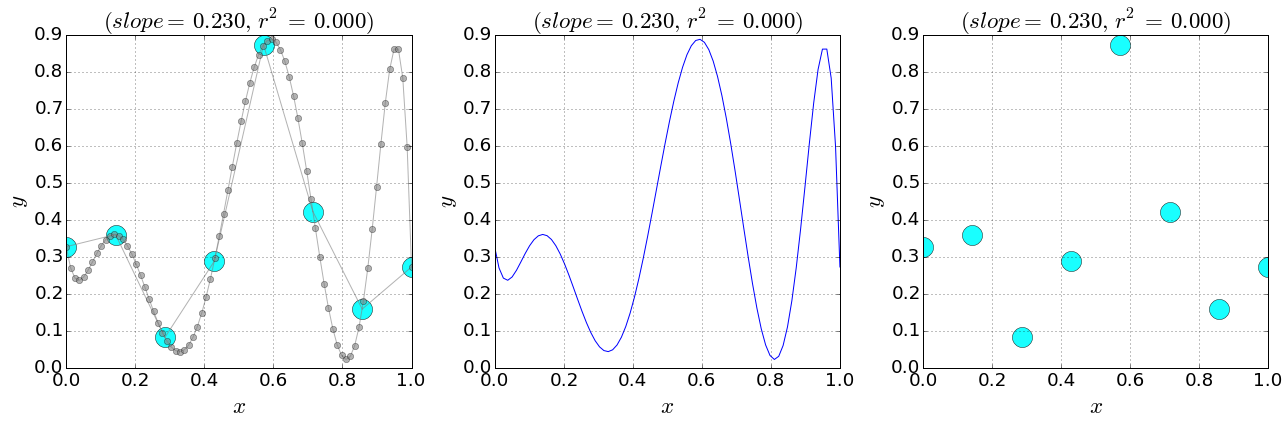

In [9]:
total_event = int(8)
gEvent = np.arange(total_event)

total_grid = total_event*10
minX = 0.0
maxX = 1.0
grid_x = np.linspace(minX, maxX, num = total_grid, retstep = False)


x = np.linspace(minX, maxX, num = total_event, retstep = False)
y = np.random.uniform(0, 1, total_event)

def AlvaThreading(x, y, total_event):
    thread_lock = np.ones([total_event, total_event, total_grid])
    thread_link = np.zeros([total_event, total_event, total_grid])
    for i in range(total_event):
        for p in range(total_event):
            thread_lock[i, p] = (grid_x[:] - x[p]) / (x[i] - x[p])
            if i == p:
                thread_lock[i, p] = np.ones(total_grid)*1
            # lock...(x - x0)(x - x1)(x - x2)
            thread_lock[i, 0] = thread_lock[i, 0] * thread_lock[i, p]
        # link...(x - x1)(x - x2) + (x - x0)(x - x2) + (x - x0)(x - x1)
        thread_link[i, 0] = thread_link[i, 0] + thread_lock[i, 0]*y[i]
    thread = thread_link[:, 0].sum(0)
    return (thread)

#####
def AlvaLine(x, y, n):
    dydx = (y[n + 1] - y[n])/(x[n + 1] - x[n])
    y0 = y[n] - dydx*x[n]
    return (dydx, y0)

def AlvaCenter(x, y, total_event):
    centerX = np.sum(x)/total_event
    centerY = np.sum(y)/total_event
    return (centerX, centerY)
    
dydx = np.zeros(total_event)
y0 = np.zeros(total_event)
for i in range(total_event - 1):
    dydx[i] = AlvaLine(x, y, i)[0]
    y0[i] = AlvaLine(x, y, i)[1]

rSquared = 0

# plotting
figure_name = '-correlation'
figure_suffix = '.png'
save_figure = os.path.join(saving_dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
figure = plt.figure(numberingFig, figsize = (18, 6))

# event
plot1 = figure.add_subplot(1, 3, 1)
plt.plot(x, y, 'o', markersize = 20, color = 'cyan', alpha = 0.9)
for i in range(total_event - 1):
    plt.plot(x[i:i+2], dydx[i]*x[i:i+2] + y0[i], color = 'gray', alpha = 0.6)
#plt.plot(AlvaCenter(x , y, total_event)[0], AlvaCenter(x , y, total_event)[1]
#         ,  'o', markersize = 20, color = 'red', alpha = 0.6)
plt.plot(grid_x, AlvaThreading(x, y, total_event), marker = 'o', markersize = 6, color = 'gray', alpha = 0.6)
plt.title(r'$ (slope = \ {:0.3f}, \ r^2 = \ {:0.3f}) $'.format(dydx[0], rSquared)
          , fontsize = AlvaFontSize)
plt.xlabel(r'$ x $'.format(), fontsize = AlvaFontSize)
plt.ylabel(r'$ y $'.format(), fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.8)
plt.yticks(fontsize = AlvaFontSize*0.8) 
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(-1, 1)
#plt.ylim(-1, 1)
plt.grid(True)

# grid
plot2 = figure.add_subplot(1, 3, 2)
plt.plot(grid_x, AlvaThreading(x, y, total_event), color = 'blue')
plt.title(r'$ (slope = \ {:0.3f}, \ r^2 = \ {:0.3f}) $'.format(dydx[0], rSquared)
          , fontsize = AlvaFontSize)
plt.xlabel(r'$ x $'.format(), fontsize = AlvaFontSize)
plt.ylabel(r'$ y $'.format(), fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.8)
plt.yticks(fontsize = AlvaFontSize*0.8) 
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(-1, 1)
#plt.ylim(-1, 1)
plt.grid(True)

# grid
plot3 = figure.add_subplot(1, 3, 3)
plt.plot(x, y, 'o', markersize = 20, color = 'cyan', alpha = 0.9)
plt.title(r'$ (slope = \ {:0.3f}, \ r^2 = \ {:0.3f}) $'.format(dydx[0], rSquared)
          , fontsize = AlvaFontSize)
plt.xlabel(r'$ x $'.format(), fontsize = AlvaFontSize)
plt.ylabel(r'$ y $'.format(), fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.8)
plt.yticks(fontsize = AlvaFontSize*0.8) 
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(-1, 1)
#plt.ylim(-1, 1)
plt.grid(True)

figure.tight_layout()
plt.savefig(save_figure, dpi = 100)
plt.show()

In [8]:
total_event = int(3)
gEvent = np.arange(total_event)

total_grid = total_event*2-1
minX = 0.0
maxX = 2.0
grid_x = np.linspace(minX, maxX, num = total_grid, retstep = False)

x = np.array([minX, 1.0, maxX])
y = np.array([0.0, 2.0, 0.0])

grid_x = np.linspace(minX, maxX, num = total_grid, retstep = False)
print grid_x
def AlvaThreading(x, y, total_event):
    thread_lock = np.ones([total_event, total_event, total_grid])
    print thread_lock
    thread_link = np.zeros([total_event, total_event, total_grid])
    for i in range(total_event):
        for p in range(total_event):
            thread_lock[i, p] = (grid_x[:] - x[p]) / (x[i] - x[p])
            if i == p:
                thread_lock[i, p] = np.ones(total_grid)*1
            # (x - x0)(x - x1)(x - x2)
            thread_lock[i, 0] = thread_lock[i, 0] * thread_lock[i, p]
            print (i, thread_lock[i, 0])
        # (x - x0)(x - x1)(x - x2) + (x - x0)(x - x1)(x - x2)
        thread_link[i, 0] = thread_link[i, 0] + thread_lock[i, 0]*y[i]
    thread = thread_link[:, 0].sum(0)
    print thread
    return (thread)

AlvaThreading(x, y, total_event)

[ 0.   0.5  1.   1.5  2. ]
[[[ 1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.]]]
(0, array([ 1.,  1.,  1.,  1.,  1.]))
(0, array([ 1. ,  0.5, -0. , -0.5, -1. ]))
(0, array([ 1.   ,  0.375, -0.   , -0.125,  0.   ]))
(1, array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ]))
(1, array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ]))
(1, array([ 0.   ,  0.375,  1.   ,  1.125, -0.   ]))
(2, array([ 0.    ,  0.0625,  0.25  ,  0.5625,  1.    ]))
(2, array([-0.     , -0.03125,  0.     ,  0.28125,  1.     ]))
(2, array([-0.     , -0.03125,  0.     ,  0.28125,  1.     ]))
[ 0.    0.75  2.    2.25  0.  ]


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in divide


array([ 0.  ,  0.75,  2.  ,  2.25,  0.  ])